In [1]:
import os
import numpy as np
from astropy.table import Table
import healpy as hp
import fitsio
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"


In [2]:
import sys
sys.path.insert(1, '/global/homes/h/hrincon/python_tools')
sys.path.insert(1, '/global/homes/h/hrincon/VAST/python')
from vast.voidfinder.voidfinder_functions import xyz_to_radecz
from vast.voidfinder._voidfinder_cython_find_next import MaskChecker

In [4]:
import VoidOverlap as vo

# Load in data

Note that for the DESI Year 1 footprint going out a redshift of 0.24, the default algorithm settings are very memory intensive. It may be better for testing purposes to set num_points_in_range = 100 in the volume overlap code to drop teh grid resolution and improve performance

In [6]:
#VoidFinder voids
vf_ngc = Table.read("../VoidFinder/iron_NGC_maximals.txt", format='ascii.commented_header')
vf_sgc = Table.read("../VoidFinder/iron_SGC_maximals.txt", format='ascii.commented_header')

In [7]:
#V2 VIDE voids
v2v_ngc = Table.read("../V2/VIDE/Iron_ngc_galzones.dat", format='ascii.commented_header')
v2v_zngc = Table.read("../V2/VIDE/Iron_ngc_zonevoids.dat", format='ascii.commented_header')
v2v_sgc = Table.read("../V2/VIDE/Iron_sgc_galzones.dat", format='ascii.commented_header')

In [8]:
#V2 REVOLVER voids
v2r_ngc = Table.read("../V2/REVOLVER/Iron_ngc_galzones.dat", format='ascii.commented_header')
v2r_zngc = Table.read("../V2/REVOLVER/Iron_ngc_zonevoids.dat", format='ascii.commented_header')
v2r_sgc = Table.read("../V2/REVOLVER/Iron_sgc_galzones.dat", format='ascii.commented_header')

In [9]:
data_table_vl = Table.read("../galaxy_catalog/iron_ngc.fits", format = "fits")

In [10]:
mask_file = "../VoidFinder/iron_NGC_mask.pickle"

In [24]:
#easily apply changes live to the volume overlap code
import importlib
importlib.reload(vo)

<module 'VoidOverlap' from '/global/homes/h/hrincon/python_tools/VoidOverlap.py'>

# Run volume overlap code

In [27]:
# Compare V^2 Revolver with V^2 VIDE
v2r_v2v_ngc = vo.OverlapCalculator(v2r_ngc, v2v_ngc, "V$^2$ REV.", "V$^2$ VIDE", mask_file, 0, 677.42914, data_table_vl, 
                                   zone_table_V1 = v2r_zngc, zone_table_V2 = v2v_zngc, V1_algorithm="V2", V2_algorithm="V2")



In [28]:
v2r_v2v_ngc.find_overlap()

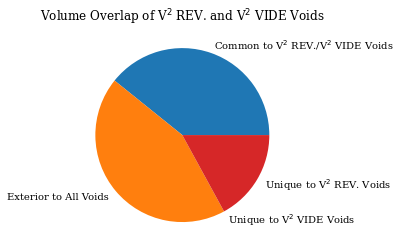

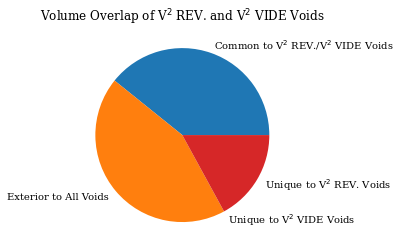

In [29]:
v2r_v2v_ngc.plot()

In [17]:
# Compare V^2 Revolver with VoidFinder
v2r_vf_ngc = vo.OverlapCalculator(v2r_ngc, vf_ngc, "V$^2$ REV.", "VoidFinder", mask_file, 0, 677.42914, data_table_vl, 
                                   zone_table_V1 = v2r_zngc, zone_table_V2 = v2v_zngc, V1_algorithm="V2", V2_algorithm="VF")


In [18]:
v2r_vf_ngc.find_overlap()

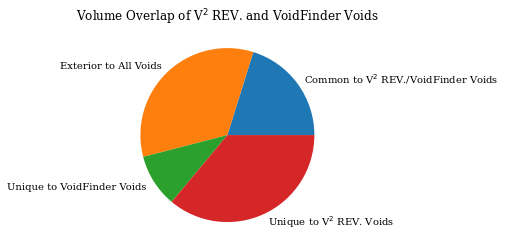

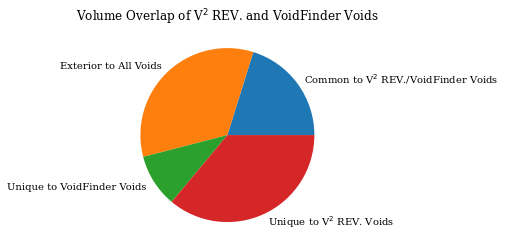

In [19]:
v2r_vf_ngc.plot()

In [20]:
# Compare VoidFinder with V^2 VIDE
vf_v2v_ngc = vo.OverlapCalculator(vf_ngc, v2v_ngc, "VoidFinder", "V$^2$ VIDE", mask_file, 0, 677.42914, data_table_vl, 
                                   zone_table_V1 = v2r_zngc, zone_table_V2 = v2v_zngc, V1_algorithm="VF", V2_algorithm="V2")


In [21]:
vf_v2v_ngc.find_overlap()

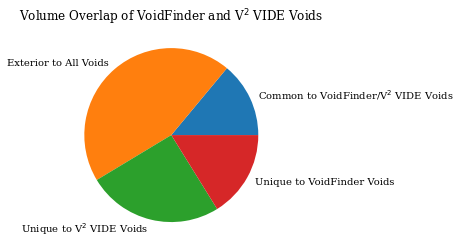

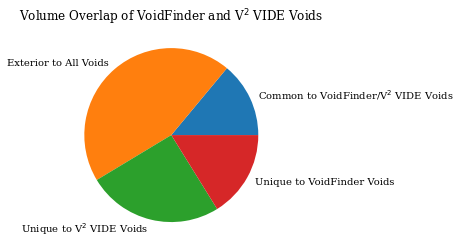

In [22]:
vf_v2v_ngc.plot()